<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-foda-project/master/img/GMITLOGO.jpg" width="500"/></p>

# GMIT, H.Dip in Data Analytics, Fundamentals of Data Analysis Project 2018

## 1. Introduction

This repository contains all of the files pertaining to my 2018 project submission for the Fundamentals of Data 
Analysis module of the GMIT H.Dip program in Data Analytics. All of the work within this repository was carried out over the course of a 4 week period in November and December 2018. This Jupyter notebook [1] contains the complete documentation for the project.

### 1.1 Project Objective

The objective of this project is to investigte and explain boxplots and their uses, by researching the subject and then demonstrating the use of box plots using `matplotlib.pyplot`[2]. There are 4 main tasks to carried out [3]:
* Summarise the history of the box plot and situations in which it used.
* Demonstrate the use of the box plot using data of your choosing.
* Explain any relevant terminology such as the terms quartile and percentile. 
* Compare the box plot to alternatives.

### 1.2 Plan for the project

The plan for this project is as follows:
1. Section 2 will give an a brief introduction to boxplots, looking at the history and the use cases. The theory behid them and technical terminology will be explained at this stage
1. In Section 3 I will analyse Ronald Fishers' Iris data set using boxplots,
1. In Section 4 I will discuss some of the findings from Section 3, looking at alternatives to the boxplot, comparing and contrasting the relative strenghts of each approach
1. The project will be concluded in Section 5

## 2. Overview of the Boxplots

### 2.1 Descriptive Statistics

When a statistician or data analyst want to understand and compare datasets, they must have some way way to summarise the dataset. For a one dimensional data set, the data summary should have some idea of where the middle of the dataset lies, and also some measure of what the spread or distribution around this middle value is. A common measure for the middle of a dataset is the *mean*. The mean is calculated by summing the values in the dataset and diving by the number of items in the dataset [4]. The *standard deviation* gives an idea of the spread of the values in the set. The standard deviation is calculated by [5]:
1. Subtracting each value in the data set from the mean
1. Squaring each result
1. Taking the average of these resultant squares
1. Taking the square root of this value

The standard deviation is in the same units as the original data.

A demonstration of how to calculate the mean and standard deviation is shown below:

In [2]:
# Create a list of data
data = [1,2,2,4,5,5,6,7,9,30]

# Calculate mean
total = 0
for i in data:
    total = total + i 
mean = total/len(data)    

# Calculate standard deviation
devsq = 0
for i in data:
    devsq = devsq + (mean - i)**2 
std_dev = (devsq/len(data))**0.5   

print("The mean of the data is : " + str(round(mean,2)))
print("The standard deviation of the data is : " + str(round(std_dev,2)))

The mean of the data is : 7.1
The standard deviation of the data is : 7.98


This demonstrates how to calculate the mean and standard deviation, note however that in this case the mean is 7.1 and only 2 out of the 10 points in the data set are above this value, the other 8 are below it. The mean has been influenced by the extremely high value (30) in the set.

While the mean and standard deviation are useful for describing a dataset - they can be heavily influenced in data has *outliers* [6]. Outliers are extreme values that deviate from other observations in data [7]. If a dataset has outliers, the *five number summary summary* can be used to better describe it.

### 2.2 The five number summary

A different set of descriptive statistics that can be used to summarise a dataset is the *five number summary*. This chooses 5 numbers to help define the centre of the data, and also how well spread out they are [6]. The five numbers are:
1. Minimum - the smallest value in the data set
1. The *first quartile* - also known as the 25th *percentile*, and denoted by *Q<sub>1</sub>*
1. The *median* - this is the midway point of the data set - 50% of the values in the set are below this value
1. The *third quartile* - also know as the 75th *percentile* and denoted by *Q<sub>3</sub>*
1. Maximum - the largest value in the data set

#### Percentiles and Quartiles

The most common definition of the term percentile, is the percentage of values that fall below a certain value [8]. To calculate the *k<sup>th</sup>* percentile (where k is a number between 1 and 100):
1. Order the data set from smallest to largest
1. Multiply *k* percent by the number of points in the data set
1. If the result from step 2 is a whole number go to step 5, otherwise round it to the nearest whole number then go to step 4
1. Count the numbers in you data set from smallest to largest until you get to the one indicated by step 3
1. The corresponding value is the *k<sup>th</sup>* percentile
1. Count the numbers in the data set until you get to the value indicated by step 2, the *k<sup>th</sup>* percentile is the average of that value and the value from the set that follows it

Quartiles are special cases of percentiles:
1. The first quartile, *Q<sub>1</sub>*, is equal to the 25<sup>th</sup> percentile
1. The second quartile (known as the the *median*) is equal to the 50<sup>th</sup> percentile
1. The third quartile, *Q<sub>3</sub>*, is equal to the 75<sup>th</sup> percentile

The the difference between *Q<sub>3</sub>*, and *Q<sub>1</sub>* is known as the *inter-quartile range*, and can be used to give an indication of the spread of the data. The median is used as an estimate for the centre of the data. 

The `pandas` package in Python can be used to calculate the five number summary for the data from the previous example:

In [3]:
# import the package
import pandas as pd
# create a dataframe from the list
df = pd.DataFrame(data, columns=["data"])
# use the describe() function to display the five number summary
df.data.describe()[['min','25%','50%','75%','max']]

min     1.00
25%     2.50
50%     5.00
75%     6.75
max    30.00
Name: data, dtype: float64

The inter-quartile range can be calculated as follows:

In [4]:
# code adapted from https://stackoverflow.com/questions/34782063/how-to-use-pandas-filter-with-iqr

# calculate the interquartile range and print
Q3 = df['data'].quantile(0.75)
Q1 = df['data'].quantile(0.25)

IQR = Q3 - Q1
print("The inter-quartile range for the data is: " + str(IQR))

The inter-quartile range for the data is: 4.25


*Note that the code above uses the **quantile** function - the quantile is another way of saying percentile - except the values are between 0 and 1 - the 25<sup>th</sup> percentile is the 0.25 quantile*

Using the 5 number summary for the data provided - the median is 5, and the interquartile range (IQR) is 4.25. Comparing these to the dataset you can see that 5 is a better estimate for the centre as 50% of the the values are above it and below it. Also an IQR of 4.25 gives a better estimation of the spread as aside from the value of 30 (which look like an outlier) - most of the values fall between plus or minus 4.25 of the median.

### 2.3 The Box Plot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary [10]. It is also a powerful graphical technique for comparing samples from two or more different treatments or populations. It was invented in the 1970s by American statistician John Wilder Tukey [11]. 
It is a compact distributional summary,  displaying less detail than a histogram or kernel density,  but also taking up less space.   Boxplots use robust summary statistics that are always located at actual data points and are quickly computable - even without a computer [12]. Over 40 years later, the box plot has become one of the most widely used statistical plots. In that time the box plot has been developed and enhanced, but Tukey's original box plot would have looked like this:

<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-foda-project/master/img/boxplot.png" width="400"/></p>
   <p style="text-align: center;"> <b><I><a href="http://www.physics.csbsju.edu/stats/box2.html">Box Plot</a></I></b> </p>  
   
The boxplot is made up of five components, carefully chosen to give a robust summary of the distribution
of a dataset:
* The median - line is drawn to show this
* The 1<sup>st</sup> and 3<sup>rd</sup> quartiles - depicted as either end of the box
* The maximum and minimum values (know as the extremes)
* Whiskers to join the extremes to the quartiles
* Potential outliers - points that are 1.5 times the interquartile range outside the extremes

The best way to demonstrate the power of the boxplot, as well as how to interprete it is through a worked example.

## 3. How to use the box plot
### 3.1 Fishers Iris Dataset
In this section of the project I am going to look at Ronald Fishers Iris Data Set [13], and use this data to demonstarte the use of the box plot. This data set containes 150 data points. Each data point has 5 data measurements, the sepal length, the sepal width, the petal lenght, the petal width and the species. The 150 points are spread evenly between the 3 species setosa, virginica and versicolor. This data set can be loaded using the seaborn library[14].

In [1]:
# import the library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# load the data set
iris = sns.load_dataset('iris')
# view a sample of the data
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
119,6.0,2.2,5.0,1.5,virginica
61,5.9,3.0,4.2,1.5,versicolor
50,7.0,3.2,4.7,1.4,versicolor
85,6.0,3.4,4.5,1.6,versicolor
38,4.4,3.0,1.3,0.2,setosa
128,6.4,2.8,5.6,2.1,virginica
131,7.9,3.8,6.4,2.0,virginica
79,5.7,2.6,3.5,1.0,versicolor
29,4.7,3.2,1.6,0.2,setosa


### 3.2 Plotting the Iris dataset with a boxplot
Boxplots are excellent for visulaising the five number summary on a singluar column of data. The code below will generate a box plot for the `sepal_lenght`.

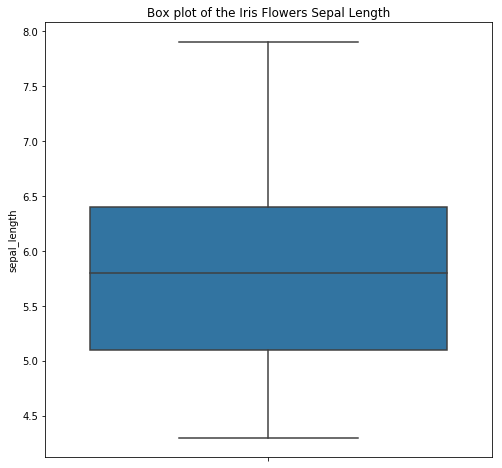

In [2]:
#resize the plot
plt.rcParams['figure.figsize'] = [8, 8]
# call the boxplot
sns.boxplot(y='sepal_length', data=iris, orient='v')
# give a title to the plot
plt.title('Box plot of the Iris Flowers Sepal Length')
plt.show()

This shows us that [15]: 
* the median value (Q2) is approx 5.8cms
* the 25th percentile (Q1) is approx 5.1cms 
* the 75th percentile (Q3) is approx 6.4, 
* the minimum value is 4.3
* the maximum value is 7.9
* there are no outliers in the dataset
* there is a slight negative skew - this means that the range between the Q2 and Q1 is slightly bigger that the range between Q3 and Q2

This is fine - but the real value with a box plot is using them the draw comparisons between different data. Say for example, we want to compare the five number summaries of the sepal lenghts of the 3 species of iris flower to see what, if any, differences exist. The boxplot is perfect for this purpose. In the nex section, we will make such a plot and then explain it.

### 3.3 Interpreting a box plot
In this section, we will look at how to interpret the data that is displayed in the box plot by using the box plot as a means to compare different data set. The first step is to plot the data.

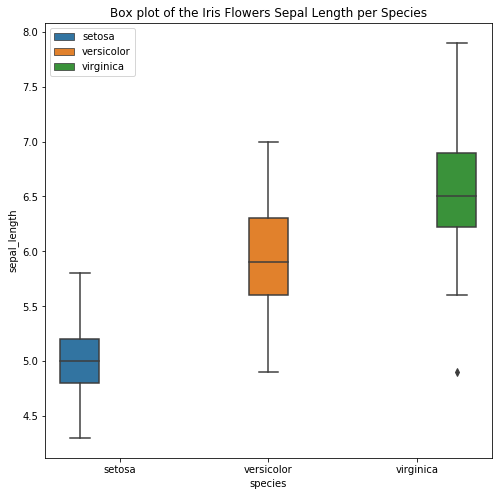

In [3]:
# resize the plot
plt.rcParams['figure.figsize'] = [8, 8]
# call the box plot - seperating by species
sns.boxplot(x='species', y='sepal_length', data=iris, orient='v', hue='species')
# give a title to the plot
plt.title('Box plot of the Iris Flowers Sepal Length per Species')
plt.legend()
plt.show()

The plot above shows 3 box plots side by side in the same picture. It shows a comparison between the 5 number summaries for the sepal lenght for the 3 differnet species of Iris flower in the the dataset. The BioTuring blog outlines a great workflow for comparing the plots shown to determine what conclusions can be drawn from the data in the set [16]. The first step is to look at the the boxes which represent the inter-quartile ranges. If the boxes do not overlap we can definitvelt say that the there is a difference. Looking at the iris flower plot above - we can decuced that the setosa sepal lenght is definietly shorter that the other 2 species as the box on that plot does not overlap with the others. 

If the boxes do overlap - like the versicolor and virginica boxes, we need to consider the median lines. If the median lines from on plot lies entirely outside of the box of the other, we can say that there is *likely* to be a difference between the 2 sets fo data. This holds true for the versicolor and virginica data - so we can say that the virginica sepal is likely to be longer that the versicolor sepal. 

If this was not the case and there was spread past both medians in the plots - we need to consider the whisters. Longer whiskers are present when there is a larger spread in the data - infact longer boxes mean that too. In our plot above - we can see that the spread for the setosa species is much smaller than the spread for the other two species.

The last thing to consider is the presence of outliers - in the dataset above there is one outlier. The other species have no outliers.

## 4. Alternatives To the Box Plot

As show in the section 3, the box plot is an excellent tool for comparing various datasets across a single parameter. Alternative graphical methods to carry out this function include:
* Histogram
* Kernal Density Plots

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness [17].  

A Kernal Density Plot visualises the distribution of data over a continuous interval or time period. This chart is a variation of a Histogram that uses kernel smoothing to plot values, allowing for smoother distributions by smoothing out the noise [18]. 

Now we will plot the sepal length data from the iris set using a box plot, a histogram and a kernal density plot.

/Users/patrickmoore/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


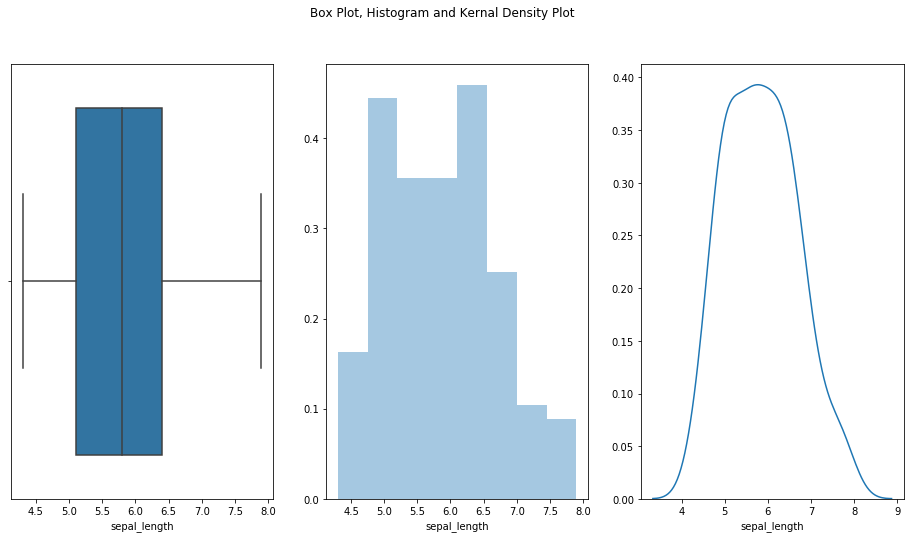

In [4]:
#resize the plot
plt.rcParams['figure.figsize'] = [16, 8]
# create sub plots using seaborn (code adapted from - https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot)
f, axes = plt.subplots(1, 3)
# plot the 3 different types of plot
sns.boxplot(y='sepal_length', data=iris, orient='h', ax=axes[0])
sns.distplot(iris['sepal_length'], kde=False, norm_hist=True, ax=axes[1])
sns.distplot(iris['sepal_length'], hist=False, ax=axes[2])
# add a title
plt.suptitle("Box Plot, Histogram and Kernal Density Plot")
plt.show()

As can be demonstrated - all 3 types of plot can be used to demonstrate the where the middle of the data is as well as the the spread of data. Personally for this type of analysis I believe an histogram gives a much more intuative display - its easier to read and the distribution of data is understood at a glance. The box plot is a little trickier to read, and the user must first try to understand what it is they are looking at. 

Where the box plot has the upper hand is in the case where a comparison is required. As shown in section 3.3, the box plot is great for putting several data sets together and making a quick visual comparison. This is not as straightforward using either a histogram or a kernal desnsity plot.

/Users/patrickmoore/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


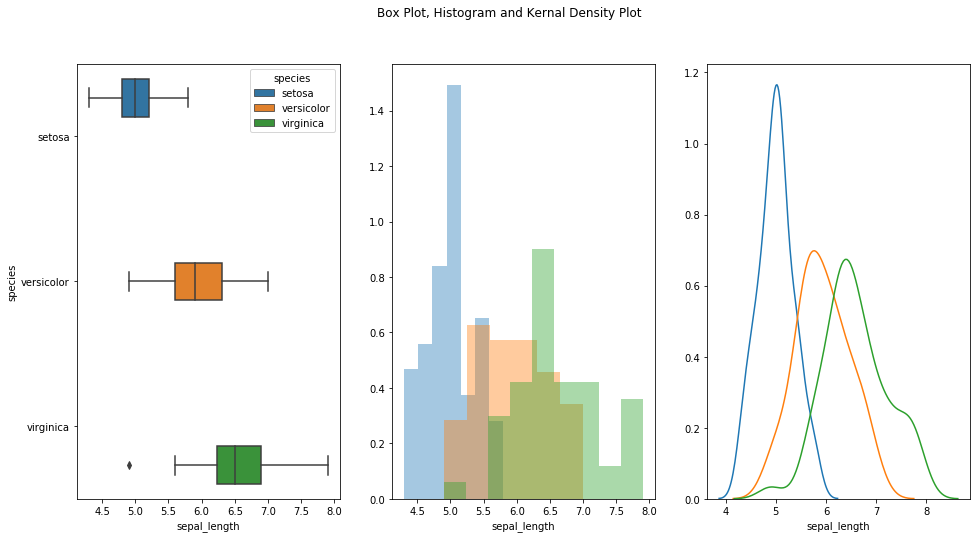

In [5]:
#resize the plot
plt.rcParams['figure.figsize'] = [16, 8]
# create sub plots using seaborn (code adapted from - https://stackoverflow.com/questions/41384040/subplot-for-seaborn-boxplot)
f, axes = plt.subplots(1, 3)

# plot the box plot of sepal length by species
sns.boxplot(y='species', x='sepal_length', data=iris, orient='h', hue='species', ax=axes[0])

# plot the histogram of sepal length by species
sns.distplot(iris[iris['species']=='setosa']['sepal_length'], kde=False, norm_hist=True, ax=axes[1])
sns.distplot(iris[iris['species']=='versicolor']['sepal_length'], kde=False, norm_hist=True, ax=axes[1])
sns.distplot(iris[iris['species']=='virginica']['sepal_length'], kde=False, norm_hist=True, ax=axes[1])

# plot the histogram of sepal length by species
sns.distplot(iris[iris['species']=='setosa']['sepal_length'], hist=False, ax=axes[2])
sns.distplot(iris[iris['species']=='versicolor']['sepal_length'], hist=False, ax=axes[2])
sns.distplot(iris[iris['species']=='virginica']['sepal_length'], hist=False, ax=axes[2])

# add a title
plt.suptitle("Box Plot, Histogram and Kernal Density Plot")
plt.show()

In this case, both the histogram and kernal density plot become very cluttered and are difficult to read, whereas the box plot is much clearer and much better for using when comparing different data visually.

## 5. Conclusion

### 5.1 Summary of the project

The objectives of the project (adapted from the project brief) was to research box plots and:

* Summarise the history of the box plot and situations in which it used.
* Demonstrate the use of the box plot using data of your choosing.
* Explain any relevant terminology such as the terms quartile and percentile. 
* Compare the box plot to alternatives


This Jupyter notebook has served as documentation for the project, and it can be seen that the project objectives have been met. The project started with some internet research into box plots and I learned about descriptive statistics. I discovered the five number summary and looked at cases where this might be more appropriate than using the mean and standard deviation to describe a dataset. I then learned about box plots and how these were developed by John Tukey to help visualise the five number summary.
I then used the `seaborn` package in python to plot some box plots ain order to demonstrate the main features of the plots.
Finally I did some research into alterntives to the box plot and looked at situations where each approach works better.
A full list of references was maintained throughout the project and this can be found at the end of this Jupyter notebook file.

### 5.2 Learning outcomes

This project was a learning exercise to help develop programming and data analysis skills for the Fundamentals of Data Analysis module of a Data Analytics Post Graduate Diploma course. The main new learnings were:

Learnings in the field of data science include:
* The five number summary - and definitions of percentile and quartile
* Box plots the history and use cases
* Kernal density functions and their uses

Overall I found the project to be an excellent learning exercise and I feel that I met all of the project requirements while learning some new concepts and skills during the course of completing it.

## References

1. [1] Project Jupyter. Project Jupyter Home. (_https://www.jupyter.org/_)  
1. [2] Matplotlib Development Team. pyplot. (*https://matplotlib.org/api/pyplot_api.html*)
1. [3] Dr. Ian McLoughlin. GMIT. Project 2018: Fundamentals of Data Analysis (_https://github.com/ianmcloughlin/funda-project-2018/raw/master/project.pdf_) 
1. [4] www.mathisfun.com. How to find the mean. (*https://www.mathsisfun.com/mean.html*)
1. [5] www.mathisfun.com. Standard Deviation and Variance. (*https://www.mathsisfun.com/standard-deviation.html*) 
1. [6] www;thoughtco.com What is the five number summary? (https://www.thoughtco.com/what-is-the-five-number-summary-3126237**)
1. [7] www.towardsdatascience.com. A Brief Overview of Outlier Detection Techniques. (https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561)
1. [8] www.statisticshowto.datascience.com. Percentiles, Percentile Rank & Percentile Range (*https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/percentiles-rank-range/*)
1. [9] Deborah J. Rumsey, PhD. Statistics For Dummies 2nd Edition. (pp. 87 - 89). (ISBN - 9781119293521)
1. [10] www.towarddatascience.com. Understanding Boxplots. (*https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51*)
1. [11] www.britannica.com. Box and Whisker Plot. (*https://www.britannica.com/science/box-and-whisker-plot*)
1. [12] Hadley Wickham and Lisa Stryjewski. 40 years of boxplots. (*http://vita.had.co.nz/papers/boxplots.pdf*)
1. [13] www.wikipedia.org. Iris flower data set. (*https://en.wikipedia.org/wiki/Iris_flower_data_set*)
1. [14] Seaborn Documentation. seaborn.boxplot. (*https://seaborn.pydata.org/generated/seaborn.boxplot.html*)
1. [15] www.medium.com. Understanding and interpreting box plots. (*https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c*)
1. [16] blog.bioturing.com. How to compare box plots. (*https://blog.bioturing.com/2018/05/22/how-to-compare-box-plots/*)
1. [17] https://statistics.laerd.com. Histograms. (*https://statistics.laerd.com/statistical-guides/understanding-histograms.php*)
1. [18] https://datavizcatalogue.com. Density Plot. (*https://datavizcatalogue.com/methods/density_plot.html*)

## End